# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the training dataset to understand the data better, visualize relationships between features, and identify any patterns or anomalies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_excel('../data/AKS02-raw-data.xlsx')
#test_data = pd.read_csv('../data/test.csv')

# Display the first few rows of the training data
df.head()

,key,namespace,pod,node,container,host_ip,pod_ip,uid,controllerKind,controllerName,deployment,collectionTimestamp,cpuUsage,cpuUsageTimestamp,memUsage,memUsageTimestamp,cpuRequest,memRequest,cpuLimit,memLimit
0,azureml/aksext-kube-state-metrics-6579749567-5...,azureml,aksext-kube-state-metrics-6579749567-5k9s7,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.158,2d368c2b-8177-40a8-b279-4eec939018b3,ReplicaSet,aksext-kube-state-metrics-6579749567,aksext-kube-state-metrics,2025-06-05T09:18:28.358Z,0.009804,2025-06-05T09:18:28.969Z,69885952,2025-06-05T09:18:29.328Z,0.01,33554432,0.1,268435456
1,azureml/aksext-kube-state-metrics-6579749567-5...,azureml,aksext-kube-state-metrics-6579749567-5k9s7,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.158,2d368c2b-8177-40a8-b279-4eec939018b3,ReplicaSet,aksext-kube-state-metrics-6579749567,aksext-kube-state-metrics,2025-06-05T09:21:46.146Z,0.000000,2025-06-05T09:21:46.610Z,233472,2025-06-05T09:21:46.939Z,0.01,33554432,0.1,268435456
2,azureml/aksext-kube-state-metrics-6579749567-5...,azureml,aksext-kube-state-metrics-6579749567-5k9s7,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.158,2d368c2b-8177-40a8-b279-4eec939018b3,ReplicaSet,aksext-kube-state-metrics-6579749567,aksext-kube-state-metrics,2025-06-05T09:22:24.301Z,0.000000,2025-06-05T09:22:24.463Z,233472,2025-06-05T09:22:24.800Z,0.01,33554432,0.1,268435456
3,azureml/aksext-kube-state-metrics-6579749567-5...,azureml,aksext-kube-state-metrics-6579749567-5k9s7,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.158,2d368c2b-8177-40a8-b279-4eec939018b3,ReplicaSet,aksext-kube-state-metrics-6579749567,aksext-kube-state-metrics,2025-06-05T09:27:37.121Z,0.000000,2025-06-05T09:27:36.762Z,233472,2025-06-05T09:27:37.073Z,0.01,33554432,0.1,268435456
4,azureml/aksext-kube-state-metrics-6579749567-5...,azureml,aksext-kube-state-metrics-6579749567-5k9s7,aks-fixedpool-14912270-vmss000009,kube-state-metrics,10.57.84.152,10.57.84.158,2d368c2b-8177-40a8-b279-4eec939018b3,ReplicaSet,aksext-kube-state-metrics-6579749567,aksext-kube-state-metrics,2025-06-05T09:28:33.302Z,0.000000,2025-06-05T09:28:31.318Z,233472,2025-06-05T09:28:31.627Z,0.01,33554432,0.1,268435456


In [2]:
df.describe()

,cpuUsage,memUsage,cpuRequest,memRequest,cpuLimit,memLimit
count,1316.000000,1.316000e+03,1316.000000,1.316000e+03,1316.000000,1.316000e+03
mean,0.001891,1.724211e+07,0.068926,6.938450e+07,0.220840,5.170611e+08
std,0.029506,1.796248e+08,0.055132,8.766858e+07,0.473861,1.236748e+09
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,2.252800e+05,0.010000,2.097152e+07,0.000000,5.242880e+07
50%,0.000000,2.293760e+05,0.100000,5.242880e+07,0.100000,5.242880e+07
75%,0.000000,3.563520e+05,0.100000,5.242880e+07,0.113500,4.194304e+08
max,0.967164,6.364496e+09,0.250000,5.368709e+08,3.000000,5.872026e+09


In [3]:
df.dtypes

key                     object
namespace               object
pod                     object
node                    object
container               object
host_ip                 object
pod_ip                  object
uid                     object
controllerKind          object
controllerName          object
deployment              object
collectionTimestamp     object
cpuUsage               float64
cpuUsageTimestamp       object
memUsage                 int64
memUsageTimestamp       object
cpuRequest             float64
memRequest               int64
cpuLimit               float64
memLimit                 int64
dtype: object

In [4]:
df2=df[['cpuRequest','cpuUsage','memRequest','memUsage']]

In [5]:
df2.corr()

,cpuRequest,cpuUsage,memRequest,memUsage
cpuRequest,1.000000,-0.034318,0.582694,-0.022457
cpuUsage,-0.034318,1.000000,-0.002522,0.129535
memRequest,0.582694,-0.002522,1.000000,-0.025640
memUsage,-0.022457,0.129535,-0.025640,1.000000


In [6]:
df_pod_cpu=df[['cpuRequest','cpuUsage']]

In [7]:
df_pod_cpu.corr()

,cpuRequest,cpuUsage
cpuRequest,1.000000,-0.034318
cpuUsage,-0.034318,1.000000


<Axes: >

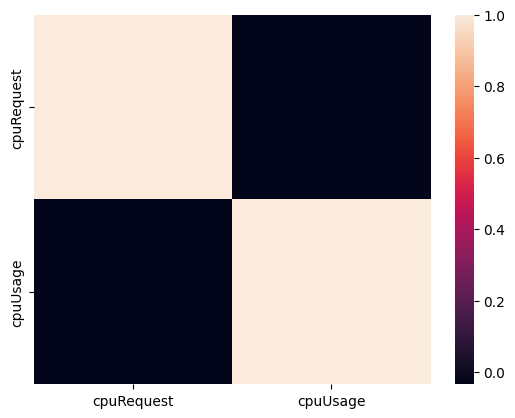

In [8]:
sns.heatmap(df_pod_cpu.corr())

In [9]:
from pycaret.regression import *
exp = setup(data=df, target='cpuUsage', session_id=123)

,Description,Value
0,Session id,123
1,Target,cpuUsage
2,Target type,Regression
3,Original data shape,"(1316, 20)"
4,Transformed data shape,"(1316, 62)"
5,Transformed train set shape,"(921, 62)"
6,Transformed test set shape,"(395, 62)"
7,Numeric features,5
8,Categorical features,14
9,Rows with missing values,38.8%


In [10]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0011,0.0002,0.0079,0.3703,0.0071,5.5699,0.1600
et,Extra Trees Regressor,0.0012,0.0002,0.0086,0.1730,0.0078,0.9944,0.2380
gbr,Gradient Boosting Regressor,0.0013,0.0002,0.0088,0.0332,0.0080,4.1142,0.2720
ada,AdaBoost Regressor,0.0016,0.0002,0.0087,0.0241,0.0079,15.5550,0.1560
dt,Decision Tree Regressor,0.0013,0.0002,0.0091,-0.2059,0.0083,1.6082,0.1120
dummy,Dummy Regressor,0.0024,0.0002,0.0090,-0.2198,0.0082,62.1042,0.1320
rf,Random Forest Regressor,0.0014,0.0002,0.0090,-0.2478,0.0082,18.5289,0.2770
huber,Huber Regressor,0.0023,0.0002,0.0095,-2.6303,0.0087,90.8618,0.1150
lasso,Lasso Regression,0.0024,0.0002,0.0095,-2.6482,0.0087,84.1914,0.1500
llar,Lasso Least Angle Regression,0.0024,0.0002,0.0095,-2.6482,0.0087,84.1914,0.1530


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [13]:
predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0657,1.5904,1.2611,0.5790,0.0517,0.0420
